<a href="https://colab.research.google.com/github/Gdearmascasta/Liberias-data/blob/main/Uso_de_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entregable #2
*German Eduardo De Armas Castaño - T00068765* <br>

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = sns.load_dataset('tips') #Importar el dataset de prueba de tips
df["tip_pct"] = df["tip"] / df["total_bill"] #agregar una columna para insertar los porcentajes
df

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


##Realizar un histograma con curva de densidad de la variable “tip” (propina en valor absoluto) y responde las siguientes preguntas:
a. ¿En qué rango se concentran la mayoría de las propinas? <br>
b. ¿Existen propinas muy altas en comparación con la mayoría? <br>
c. ¿La distribución es simétrica o presenta sesgo hacia un lado? <br>

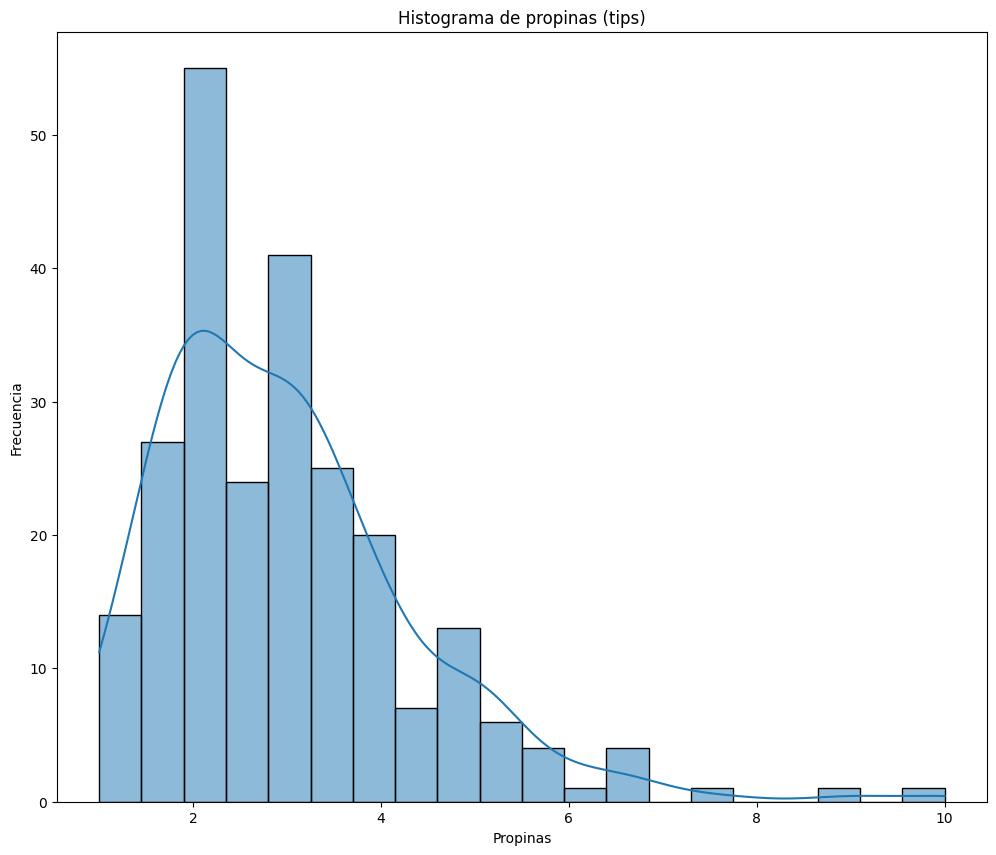

In [ ]:
plt.figure(figsize=(12,10))
sns.histplot(df["tip"].dropna(),bins=20,kde=True)
plt.title("Histograma de propinas (tips)")
plt.xlabel("Propinas")
plt.ylabel("Frecuencia")
plt.show()

R/a: La mayoría de las propinas se concentran en un rango de aproximadamente 2 a 4,por lo cual,  El histograma muestra un aumento en la frecuencia de propinas en este intervalo. <br>

R/b:Sí, en la gráfica se pueden observar algunas propinas altas (por encima de 7), pero estas son poco frecuentes en comparación con la mayoría de las observaciones. Las barras correspondientes a las propinas más altas son pequeñas en altura, lo que indica que hay menos datos en ese rango. <br>

R/c: La distribución no es simétrica, sino que presenta un sesgo hacia la derecha o positivo (la cola del histograma se extiende más hacia la derecha).

###2. Realizar un histograma con curva de densidad de la variable “tip_pct” (porcentaje de propina), diferenciando por tipo de comida (time: Lunch o Dinner) y responde las siguientes preguntas:
a ¿Cuál es la diferencia principal entre la distribución de propinas en almuerzos y en cenas? <br>
b. ¿En cuál de los dos horarios parece haber mayor variabilidad en el porcentaje de propina?

/tmp/ipython-input-2286093079.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('time')['tip_pct'].agg(['count','mean','median','std'])


,count,mean,median,std
time,,,,
Lunch,68,0.164128,0.154084,0.040242
Dinner,176,0.159518,0.155400,0.067477


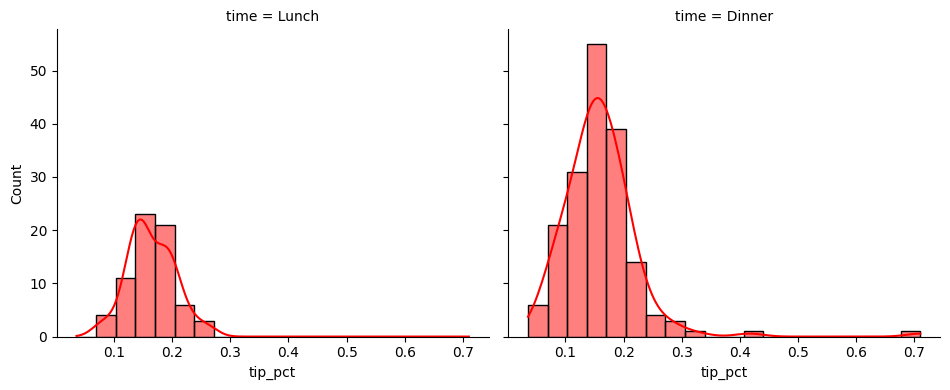

In [ ]:
sns.displot(data=df,color="red", x='tip_pct', kde=True, col='time', bins=20, height=4, aspect=1.2)

df.groupby('time')['tip_pct'].agg(['count','mean','median','std'])



R/a:La principal distinción entre ambos turnos es la cantidad y el comportamiento de las propinas. Durante la cena, se registran más transacciones y el porcentaje de propina es mucho más variable. En contraste, durante el almuerzo, los datos son menos numerosos y el porcentaje de propina se mantiene dentro de un rango más uniforme.<br>

 R/b:  La mayor variabilidad se observa en Dinner

#3. Ver si el total de la cuenta aumenta con el tamaño de la mesa y comparar la dispersión.

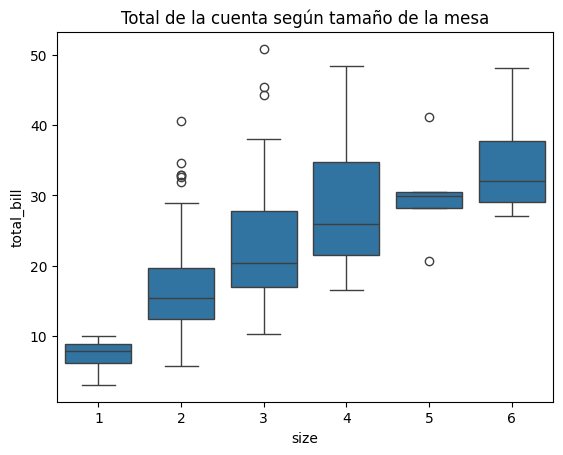

,total_bill
size,
1,7.242500
2,16.448013
3,23.277632
4,28.613514
5,30.068000
6,34.830000


In [ ]:
sns.boxplot(data=df, x='size', y='total_bill')
plt.title('Total de la cuenta según tamaño de la mesa')
plt.show()
df.groupby('size')['total_bill'].mean()



R/a: A medida que el número de comensales en una mesa aumenta, también lo hace el total de la cuenta. Además, las cuentas para mesas más grandes tienden a variar mucho, mientras que para mesas pequeñas (de 1 a 2 personas) los totales son más bajos y consistentes. <br>

R/b:  El tamaño de la mesa influye directamente en el total y en la variabilidad de la cuenta. Específicamente, las cuentas de mesas grandes son más elevadas y tienen una mayor dispersión de valores, mientras que en mesas más pequeñas (de una o dos personas) los totales son menores y muestran una variabilidad mucho más baja. <br>

R/c: La cantidad total a pagar está directamente relacionada con el número de personas en la mesa. Las mesas grandes no solo generan cuentas más altas, sino que también presentan una mayor dispersión, lo que significa que los totales pueden fluctuar ampliamente. Por el contrario, las mesas pequeñas (con 1 o 2 personas) resultan en cuentas más modestas y uniformes.



#4.  Boxplot de tip_pct por day

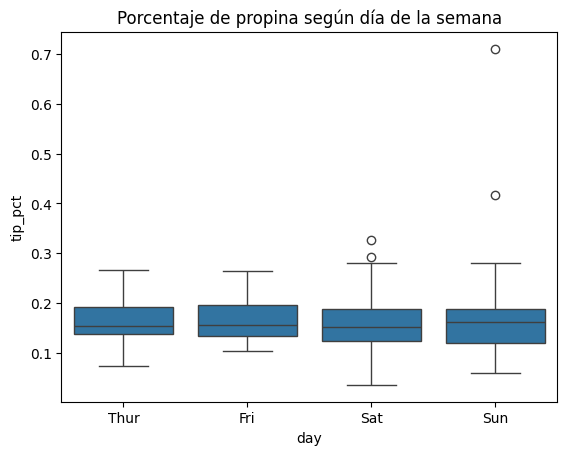

/tmp/ipython-input-1231673615.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day')['tip_pct'].agg(['count','mean','median'])


,count,mean,median
day,,,
Thur,62,0.161276,0.153846
Fri,19,0.169913,0.155625
Sat,87,0.153152,0.151832
Sun,76,0.166897,0.161103


In [ ]:
sns.boxplot(data=df, x='day', y='tip_pct', order=['Thur','Fri','Sat','Sun'])
plt.title('Porcentaje de propina según día de la semana')
plt.show()
df.groupby('day')['tip_pct'].agg(['count','mean','median'])

¿Qué día las propinas (en %) suelen ser mayores?
El día con el mayor porcentaje de propinas es el viernes. <br>

¿En qué día la mediana es más alta?
Los domingos es el día que presenta la mediana de propinas más alta, lo que indica que, en general, los porcentajes de propina en este día son consistentemente superiores a los de otros. <br>

¿Se observan outliers?
Se han detectado múltiples valores atípicos (outliers) en los datos de propinas, lo que sugiere la existencia de propinas inusualmente altas o bajas que se desvían de la tendencia general observada, principalmente los dias sabado y domingo.



#5.Matriz de correlación "Heatmap"

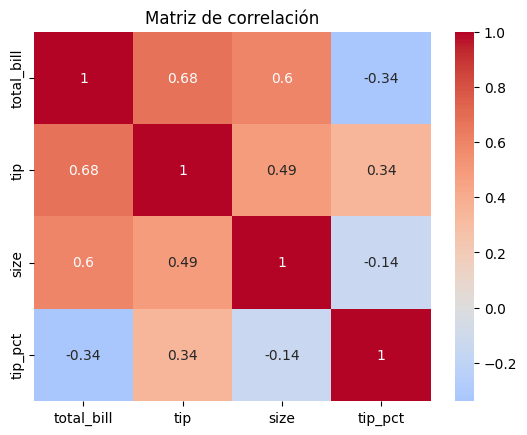

,total_bill,tip,size,tip_pct
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_pct,-0.338624,0.342370,-0.142860,1.000000


In [ ]:
corr = df[['total_bill','tip','size','tip_pct']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación')
plt.show()
corr

Relación entre Cuenta, Propinas y Tamaño de la Mesa
- Mayor cuenta, mayor propina: Existe una correlación positiva entre el total de la cuenta y el monto de la propina. Esto significa que, por lo general, a medida que la cuenta aumenta, la propina en términos absolutos también lo hace. <br>

Tamaño de la mesa y cuenta total
- El tamaño del grupo de comensales (la mesa) también muestra una correlación con el total de la cuenta, aunque esta relación es ligeramente menos fuerte que la que existe entre el total y la propina. Es decir, las mesas más grandes tienden a tener cuentas más altas. <br>

El porcentaje de propina es independiente
- El porcentaje de propina (el monto de la propina dividido por la cuenta total) no parece estar fuertemente relacionado ni con el total de la cuenta ni con el tamaño de la mesa. Esto sugiere que el porcentaje de propina que una persona da depende de otros factores no incluidos en este análisis.